# Analysis of Citibike Data in NYC
## Introduction

The objective of this project is to analyze a large random sample of Citibike data from the years 2013 to 2019. We will look at different trends between location and month, as well as trends in the type of users and so much more. Hopefully after reading this tutorial, you will not only be able to understand more about different statistics/trends about the Citibike data, but also how much Citibike has become integrated in the lives of New Yorkers.

## Required Python Modules
The main python modules we will be using in our project are:
1. folium
2. requests
3. pandas
4. numpy
5. re
6. datetime
7. statistics
8. stats_models
9. matplotlib
10. sklearn
11. urllib
12. zipfile
13. warnings

In [96]:
!pip install folium
import requests #for get request
import pandas as pd #pandas
import numpy as np #module
import re #regex
from datetime import datetime #datetime objects
import matplotlib.pyplot as plt #for plotting
import folium
import urllib
import zipfile
import statistics
from folium.plugins import HeatMap
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Data Collection

This is the data collection phase of the data life cycle. During this phase, our focus is on collecting and transforming the data into a usable form. In our case, that usable form is a pandas dataframe derived from a CSV file containing the original data. <br> <br>

After doing a lot of research for a dataset, we started to look towards the travel industry for motivation. We were motivated by data that contained information regarding ride sharing. At the end, we finalized our search on publicly available bike sharing data from Citi Bike NYC. We retrieved the data from the following site: https://s3.amazonaws.com/tripdata/index.html?fbclid=IwAR3BJ9yWYcKtBRYUMQq2SI1IZR9AnFel3C-eTato4mWXtwBz4olhrdrai7Js

The company had available several months worth of data, ranging from June of 2013 to October of 2019, so we decided to explore each of these months. In attempting to utilize the data from the entire data range mentioned, we needed to perform several steps to automate the download and collection process. The following process will describe how we went about collecting and manipulating the data into one aggregate dataframe containing a certain number of entries of each date. <br>

To collect and store the data, we used the following libraries from above:
1. urllib
2. zipfile
3. pandas

As mentioned before, the data was organized by year, and then month, so it was quite predictable in terms of figuring out how to extract the data files from the site. However, there were some unique aspects that required some workarounds. We looped through each year and month pair from June of 2013 to October of 2019. All of the month numbers in the file names had 2 digits, so we need to make sure all months before October (10th month) were **prepended with a "0"**. Most of the zip files followed the format **"{date}{month_2_digit}-citibike-tripdata.zip"**. The remaining zip files had a slightly different name format of **"{date}{month_2_digit}-citibike-tripdata.csv.zip"**. To get work around this, we instituted a check in the loop to determine if the current year was after 2016. If so, then the url and zip file name would be updated accordingly. 

Once those alterations were completed, as necessary, we proceeded to download the file data. To do so, we utilized the library function **urllib.request.urlretrieve** to download the zip file, indicated by the corresponding url, to the corresponding file path location, which was the current directory in this case. With the zip file downloaded, we proceeded to extract the contents of the zip file, only one CSV file in this case, using zipfile **extractall** method and extracted it to the current directory. We also retrieved the name of the file using the zipfile **namelist** and indexing at 0, as there is always only one element (CSV file) in said list. <br>
    
With the CSV data file download and extracted from the corresponding zip file, we transferred it into a pandas dataframe object. We made sure to add year and moth column to differentiate these data points from entries in future CSV files. After that, we decided to add only a sample of the resulting dataframe to our aggregate dataframe. This was due to the fact there were too many entries in every CSV file, so it would be impractical and inefficient to collect every data from each CSV for exploratory data analysis. With that in mind, we decided to randomly sample 10000 rows from each dataframe to be used for data analysis using the pandas **sample** method without replacement. In sampling with n=10000, we get a good representation of the data for that specific date.<br>
    
One issue we ran into when generating each sampled dataframe was with the column (attribute) names. We realized that, after approximately 2017, the attribute names were capitalized. Due to this difference, the resulting aggregate dataframe at first contained many NaNs because pandas concatenates dataframes based on their column names. The dataframe resulted in having 2 times the normal amount of column names: half being lowercase and half being capitalized. Ignoring case, the column names across all CSV files were identical. To work around this, we decided to create a list of default, lowercase column names, **col_names**, and replaced the column names of each sampled dataframe with our list. <br>
    
After iterating over each date, we ended up with a **list of 77 dataframes**, each corresponding to a specific date from the data. Since, we made sure that all of these dataframes had the same column names, we proceeded to concatenate all of them into one aggregate dataframe, as mentioned before. With 77 dataframes, each with 10000 randomly sampled data points, the new aggregate dataframe contained **770001** total data points. To do this, we utilized the pandas **concat** function, because it we could pass an iterable, which, in this case, was our list of sampled dataframes. The resulting dataframe was returned as output for display purposes.

In [ ]:
# The data begins starting on June of 2013. 
year = 2013
month = 6

# In some of the csv files, we found that the column names differed by 
# capitalization, so below is a standard list of the all of the column
# names that we apply to each sampled dataframe. 
col_names = ['tripduration', 'starttime', 'stoptime', 'start station id',
 'start station name', 'start station latitude', 'start station longitude',
 'end station id', 'end station name', 'end station latitude',
 'end station longitude', 'bikeid', 'usertype', 'birth year', 'gender', 'year',
 'month']

# A list to hold all of the dataframes
list_dfs = []

# The last csv file contains the data recorded on October of 2019. The
# loop will increment by 1 month, until after this date is reached. 
while (not (year == 2019 and month == 11)):
    date_str = f'{year}{month}'
    
    # If the month is before October (10), prepend the corresponding 
    # integer value with a 0 to make it 2 digits
    if month < 10:
        date_str = f'{year}0{month}'
    
    # Corresponding download URL for each relevant zip file
    url = f'https://s3.amazonaws.com/tripdata/{date_str}-citibike-tripdata.zip'
    # Corresponding name for each relevant zip file
    zip_file = f'{date_str}-citibike-tripdata.zip'
    
    # Format of zip file name changes after 2016, so this if stmt accounts for that
    if (year > 2016):
        url = f'https://s3.amazonaws.com/tripdata/{date_str}-citibike-tripdata.csv.zip'
        zip_file = f'{date_str}-citibike-tripdata.csv.zip'
    
    # Zip file path points to the current directory "."
    zip_file_path = f'./{zip_file}'
    
    print(year, month)
    
    # Download the corresponding zip file
    urllib.request.urlretrieve(url, zip_file)
    
    csv_filename = ''
    
    # Extract the csv from the zip file and get its name
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall('.')
        csv_filename = zip_ref.namelist()[0]
    
    # Read the csv file into a pandas dataframe
    df = pd.read_csv(f'./{csv_filename}')
    
    # Add the year and month attributes to distinguish from entries
    # from entries from other dates
    df['year'] = year
    df['month'] = month  
    
    # Take a random sample of 10000 data points from the csv
    sampled_df = df.sample(10000, replace=False, random_state=1)  
    
    # Make sure that all of the dataframes have the same attribute formats
    sampled_df.columns = list(col_names)    
    print(sampled_df.columns.values)
    
    # Add the dataframe to a list containing all dataframes 
    list_dfs.append(sampled_df)   
    
    # Increment by 1 month. Increment the year by 1 if month goes past Dec.
    month += 1  
    if (month > 12):
        month = 1
        year += 1

# Concatenate all dataframes together to form a cumulative dataframe 
bikes_df = pd.concat(list_dfs)     
bikes_df

After creating the dataframe containing sampled observations from every date in the range of June of 2013 to October of 2019, we decided to export it to a CSV file for future use by using the pandas **to_csv** method. The reason behind this was because the process of downloading, extracting, and converting the data from the site was time and memory intensive. Another related thing to note was that kernel did die on occasion and had to restart. For this reason, rather than repeatedly performing these operations every time, we exported to the resulting dataframe to a CSV for efficiency purposes. It will later be converted back to a dataframe object when we begin our data analysis below. 

In [ ]:
# Write the dataframe to a csv file for later use and safe keeping
bikes_df.to_csv('./FINAL_SAMPLED_DATA.csv', index=False)

In [2]:
# Retrieve the saved dataset (FINAL_SAMPLED_DATA.csv) from zip file here
with zipfile.ZipFile('./FINAL_SAMPLED_DATA.csv.zip', 'r') as zip_ref:
    zip_ref.extractall('.')
    csv_filename = zip_ref.namelist()[0]
bikes_df = pd.read_csv(csv_filename)
bikes_df

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,year,month
0,300,2013-06-30 19:21:20,2013-06-30 19:26:20,530.0,11 Ave & W 59 St,40.771522,-73.990541,449.0,W 52 St & 9 Ave,40.764618,-73.987895,17034,Subscriber,1969.0,1,2013,6
1,616,2013-06-29 15:40:45,2013-06-29 15:51:01,238.0,Bank St & Washington St,40.736197,-74.008592,79.0,Franklin St & W Broadway,40.719116,-74.006667,19847,Customer,NaN,0,2013,6
2,781,2013-06-26 12:59:35,2013-06-26 13:12:36,435.0,W 21 St & 6 Ave,40.741740,-73.994156,487.0,E 20 St & FDR Drive,40.733143,-73.975739,19195,Subscriber,1965.0,2,2013,6
3,1633,2013-06-21 18:42:01,2013-06-21 19:09:14,491.0,E 24 St & Park Ave S,40.740964,-73.986022,243.0,Fulton St & Rockwell Pl,40.688226,-73.979382,20195,Customer,NaN,0,2013,6
4,574,2013-06-02 09:10:43,2013-06-02 09:20:17,398.0,Atlantic Ave & Furman St,40.691652,-73.999979,2000.0,Front St & Washington St,40.702551,-73.989402,19606,Subscriber,1957.0,1,2013,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
769995,477,2019-10-18 18:11:08.4780,2019-10-18 18:19:06.1790,402.0,Broadway & E 22 St,40.740343,-73.989551,267.0,Broadway & W 36 St,40.750977,-73.987654,38486,Subscriber,1978,1,2019,10
769996,770,2019-10-01 18:52:59.1080,2019-10-01 19:05:50.0560,3016.0,Kent Ave & N 7 St,40.720368,-73.961651,3452.0,Bayard St & Leonard St,40.719156,-73.948854,35125,Customer,1969,0,2019,10
769997,250,2019-10-04 15:38:44.3080,2019-10-04 15:42:54.4630,301.0,E 2 St & Avenue B,40.722174,-73.983688,401.0,Allen St & Rivington St,40.720196,-73.989978,34112,Subscriber,1986,1,2019,10
769998,594,2019-10-18 21:08:55.7210,2019-10-18 21:18:49.8250,3707.0,Lexington Ave & E 26 St,40.741459,-73.983293,432.0,E 7 St & Avenue A,40.726218,-73.983799,14545,Subscriber,1991,2,2019,10


Now we can explain what each column in the data set means. It is explained in the list below: 
1. 'tripduration': the bike trip duration measured in seconds
2. 'starttime': the start time of the trip 
3. 'stoptime': the stop time of the trip 
4. 'start station id': the id of the starting Citibike station
5. 'start station name': the name of the starting Citibike station
6. 'start station latitude': the latitude of the starting Citibike station
7. 'start station longitude': the longitude of the starting Citibike station
8. 'end station id': the id of the ending Citibike station
9. 'end station name': the name of the ending Citibike station
10. 'end station latitude': the latitude of the ending Citibike station
11. 'end station longitude': the longitude of the ending Citibike station
12. 'bikeid': the id of the bike
13. 'usertype': customer => 24-hour pass or 3-day pass user; subscriber => Annual Member
14. 'birth year': the birth year of the user 
15. 'gender': 0 => Unknown; 1 => Male; 2 => Female


## Data Processing

The first thing we wanted to do is remove any incomplete data, especially those that had NaN for locations. For our heatmaps later on, we decided to construct them on the basis of start and end latitudes and longitudes. To do this, we utilizied the pandas **dropna** method to drop all rows that contained NaNs. We felt that this was safer than trying to impute values because, for example, it would be infeasible to replace unknown location values.

In addition, we noticed that several of the years had **"\N"** as an entry, which indicates that the year in the record is unknown. As a result, we resolved to drop those rows from the data, as we were planning on using those values in the data analysis later on. We only included rows that did not have **"\N"** as a value.


In [3]:
bikes_df = bikes_df.dropna()

bikes_df = bikes_df[bikes_df['birth year'] != '\\N']

bikes_df

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,year,month
0,300,2013-06-30 19:21:20,2013-06-30 19:26:20,530.0,11 Ave & W 59 St,40.771522,-73.990541,449.0,W 52 St & 9 Ave,40.764618,-73.987895,17034,Subscriber,1969.0,1,2013,6
2,781,2013-06-26 12:59:35,2013-06-26 13:12:36,435.0,W 21 St & 6 Ave,40.741740,-73.994156,487.0,E 20 St & FDR Drive,40.733143,-73.975739,19195,Subscriber,1965.0,2,2013,6
4,574,2013-06-02 09:10:43,2013-06-02 09:20:17,398.0,Atlantic Ave & Furman St,40.691652,-73.999979,2000.0,Front St & Washington St,40.702551,-73.989402,19606,Subscriber,1957.0,1,2013,6
7,313,2013-06-09 14:21:06,2013-06-09 14:26:19,527.0,E 33 St & 2 Ave,40.744023,-73.976056,469.0,Broadway & W 53 St,40.763441,-73.982681,19142,Subscriber,1981.0,1,2013,6
9,1073,2013-06-12 21:05:36,2013-06-12 21:23:29,517.0,Pershing Square South,40.751581,-73.977910,440.0,E 45 St & 3 Ave,40.752554,-73.972826,16476,Subscriber,1957.0,1,2013,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
769995,477,2019-10-18 18:11:08.4780,2019-10-18 18:19:06.1790,402.0,Broadway & E 22 St,40.740343,-73.989551,267.0,Broadway & W 36 St,40.750977,-73.987654,38486,Subscriber,1978,1,2019,10
769996,770,2019-10-01 18:52:59.1080,2019-10-01 19:05:50.0560,3016.0,Kent Ave & N 7 St,40.720368,-73.961651,3452.0,Bayard St & Leonard St,40.719156,-73.948854,35125,Customer,1969,0,2019,10
769997,250,2019-10-04 15:38:44.3080,2019-10-04 15:42:54.4630,301.0,E 2 St & Avenue B,40.722174,-73.983688,401.0,Allen St & Rivington St,40.720196,-73.989978,34112,Subscriber,1986,1,2019,10
769998,594,2019-10-18 21:08:55.7210,2019-10-18 21:18:49.8250,3707.0,Lexington Ave & E 26 St,40.741459,-73.983293,432.0,E 7 St & Avenue A,40.726218,-73.983799,14545,Subscriber,1991,2,2019,10


We will first turn the starttime and stoptime column values into datetime objects. This will help us later on in the analysis when we need to access individual elements of the time (hour, day, year etc.). The format of the datetime object will be 'year-month-day hour:minute:second:millisecond'. We will be using Python's build-in function 'to_datetime' to help us convert the strings into datetime objects.

In addition, we noticed that some of the data for the years was stored as an object or float, rather than just an int. As a result, we made sure to convert all year values to integers, so that we could use it for later reference. 


In [4]:
# Convert starttime column values into datetime objects
bikes_df['starttime'] = pd.to_datetime(bikes_df['starttime'])

# Convert stoptime column values into datetime objects
bikes_df['stoptime'] = pd.to_datetime(bikes_df['stoptime'])

# Convert birth year to integer
bikes_df['birth year'] = pd.to_numeric(bikes_df['birth year'], downcast='integer')
bikes_df['year'] = pd.to_numeric(bikes_df['year'], downcast='integer')

# Print the resulting dataframe
bikes_df


,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,year,month
0,300,2013-06-30 19:21:20.000,2013-06-30 19:26:20.000,530.0,11 Ave & W 59 St,40.771522,-73.990541,449.0,W 52 St & 9 Ave,40.764618,-73.987895,17034,Subscriber,1969,1,2013,6
2,781,2013-06-26 12:59:35.000,2013-06-26 13:12:36.000,435.0,W 21 St & 6 Ave,40.741740,-73.994156,487.0,E 20 St & FDR Drive,40.733143,-73.975739,19195,Subscriber,1965,2,2013,6
4,574,2013-06-02 09:10:43.000,2013-06-02 09:20:17.000,398.0,Atlantic Ave & Furman St,40.691652,-73.999979,2000.0,Front St & Washington St,40.702551,-73.989402,19606,Subscriber,1957,1,2013,6
7,313,2013-06-09 14:21:06.000,2013-06-09 14:26:19.000,527.0,E 33 St & 2 Ave,40.744023,-73.976056,469.0,Broadway & W 53 St,40.763441,-73.982681,19142,Subscriber,1981,1,2013,6
9,1073,2013-06-12 21:05:36.000,2013-06-12 21:23:29.000,517.0,Pershing Square South,40.751581,-73.977910,440.0,E 45 St & 3 Ave,40.752554,-73.972826,16476,Subscriber,1957,1,2013,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
769995,477,2019-10-18 18:11:08.478,2019-10-18 18:19:06.179,402.0,Broadway & E 22 St,40.740343,-73.989551,267.0,Broadway & W 36 St,40.750977,-73.987654,38486,Subscriber,1978,1,2019,10
769996,770,2019-10-01 18:52:59.108,2019-10-01 19:05:50.056,3016.0,Kent Ave & N 7 St,40.720368,-73.961651,3452.0,Bayard St & Leonard St,40.719156,-73.948854,35125,Customer,1969,0,2019,10
769997,250,2019-10-04 15:38:44.308,2019-10-04 15:42:54.463,301.0,E 2 St & Avenue B,40.722174,-73.983688,401.0,Allen St & Rivington St,40.720196,-73.989978,34112,Subscriber,1986,1,2019,10
769998,594,2019-10-18 21:08:55.721,2019-10-18 21:18:49.825,3707.0,Lexington Ave & E 26 St,40.741459,-73.983293,432.0,E 7 St & Avenue A,40.726218,-73.983799,14545,Subscriber,1991,2,2019,10


## Exploratory Analysis and Data Visualization

We will be plotting our data and analyzing trends that may be significant. Some plots you will see are most popular starting points of trips, comparison between subscriber and customer of Citibikes, the day that most people use the Citibikes, and so much more. 

### Plotting Frequency of Start Time of Trip
We will be plotting the number of occurrences during the day when people begin their trip. 


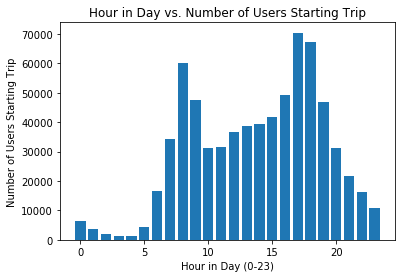

In [5]:
time_of_day = {}

# Fill time_of_day hash table with 0 occurrences of users for each hour
for i in range(0, 24):
    time_of_day[i] = 0

# Loop through dataframe and increase counts of users by one 
# for that hour if the user started the trip at that hour
for index, row in bikes_df.iterrows():
    datetime_obj = row['starttime']
    time_of_day[datetime_obj.hour] += 1

# We will now plot histogram of the time of day people start using the bikes.
plt.bar(time_of_day.keys(), time_of_day.values(), align='center')
plt.xlabel('Hour in Day (0-23)')
plt.ylabel('Number of Users Starting Trip')
plt.title('Hour in Day vs. Number of Users Starting Trip')
plt.show()

By looking at the graph above, most of the people rent Citibikes around 8am and 5pm. The reason for these two peaks at these two times could be that these two times correspond to when most people are going to work and leaving work.

### Plotting Most Popular Days of the Week

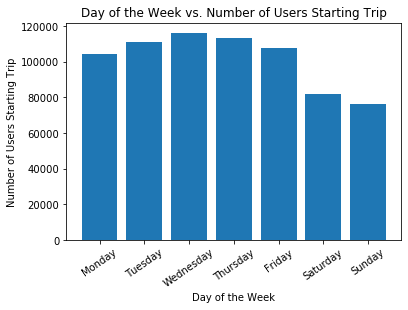

In [6]:
week_day= {}

# Fill time_of_day hash table with 0 occurrences of users for each hour
for i in range(0, 7):
    week_day[i] = 0

# Loop through dataframe and increase counts of users by one 
# for that hour if the user started the trip at that hour
for index, row in bikes_df.iterrows():
    datetime_obj = row['starttime']
    week_day[datetime_obj.weekday()] += 1

# We will now plot histogram of the time of day people start using the bikes.
days = ['Monday','Tuesday','Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday']
plt.bar(week_day.keys(), week_day.values(), align='center')
plt.xticks(list(week_day.keys()), days, rotation=35)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Users Starting Trip')
plt.title('Day of the Week vs. Number of Users Starting Trip')
plt.show()

### Analyzing Source/Destination Stations
Now, we want to try to find some trend and information about the Citibike stations in NYC. We will first try plotting heatmaps to see if we can find something interesting and then later on, we will plot the top Citibike stations that people go to for their bikes. By plotting these graphs, it will help us learn more about the location of Citibike stations as well as the most popular stations in NYC. 

#### Heatmaps of Source/Destination Stations
First, we will be plotting the heatmap of source and destination locations. By plotting this, we will hopefully be able to analyze stations where most users retrieve and dock their bikes at in NYC. The brighter an area is (more orange/yellow) the more users that were in that area retrieving/docking their bikes. Feel free to zoom in too to take a closer look at the different areas in the city where most people are using Citibikes. 

The following is the Source Stations Heatmap: 

In [7]:
# The code below will plot the heatmap of source locations 
map_osm = folium.Map(location=[40.7358, -73.9760], zoom_start=11.5)

# Create HeatMap of the crimes in Baltimore
bikes_df['count'] = 1
HeatMap(data=bikes_df[['start station latitude', 'start station longitude', 'count']]
        .groupby(['start station latitude', 'start station longitude'])
        .sum().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(map_osm)

map_osm

The following is the Destination Stations HeatMap: 

In [8]:
# The code below will plot the heatmap of destination locations 
map_osm = folium.Map(location=[40.7358, -73.9760], zoom_start=11.5)

# Create HeatMap of the crimes in Baltimore
bikes_df['count'] = 1
HeatMap(data=bikes_df[['end station latitude', 'end station longitude', 'count']]
        .groupby(['end station latitude', 'end station longitude'])
        .sum().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(map_osm)

map_osm

By looking at the two maps above, at first glance, we can see that most people start their trips in the heart of Manhattan and Brooklyn. If we zoom in more, we can get a greater sense of where most people start/end their trips from. In the source destination heatmap, we can that around 45th street and the southernest part of Manhattan, there is a good amount of trips that start from the stations near there. Likewise, we can see the same trend in the destination heatmap. We can next plot the most popular starting/ending stations and see them on the map. By doing this, we can single out the most popular stations in NYC and hopefully understand why they are so popular.   

#### Plotting Popular Source/Destination Stations
Instead of plotting a heatmap, we can plot the top 10 source stations as well as the top 10 destination stations from all the years 2013-2019. By plotting this, we can see more about where these stations are on the map and see if they correspond to the high concentration of users on the heatmap above. 

Text(0.5, 1.0, 'Top 10 Destination Stations with Most Users')

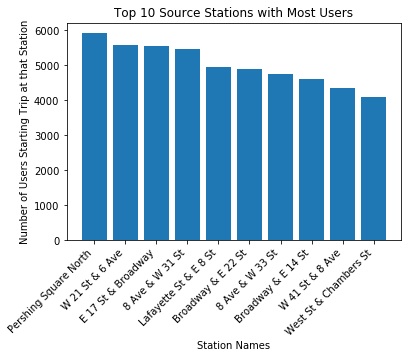

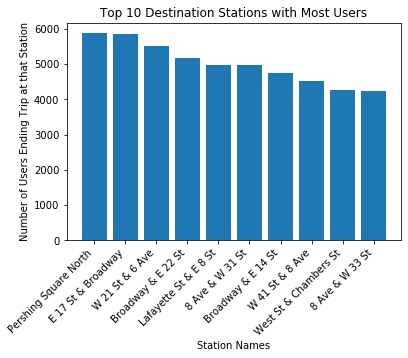

In [32]:
stations_start = {}
stations_end = {}

# Loop through dataframe and keep count of the number of people who leave 
# from the stations and arrive at the stations
for index, row in bikes_df.iterrows():
    station_name_start = row['start station name']
    station_name_end = row['end station name']
    
    if station_name_start not in stations_start:
        stations_start[station_name_start] = 0
        
    if station_name_end not in stations_end:
        stations_end[station_name_end] = 0
        
    stations_start[station_name_start] += 1
    stations_end[station_name_end] += 1

# Sort the hash by value and retrieve top 10 source/destination stations
stations_start = sorted(stations_start.items(), key=lambda x:-x[1])[:10]
stations_end = sorted(stations_end.items(), key=lambda x:-x[1])[:10]

# Extract first 10 highest items from hash (stations with most users)
# and fill up the x and y lists that we will plot
top_x_start = []
top_y_start = []
top_x_end = []
top_y_end = []
for key, value in stations_start:
    top_x_start.append(key)
    top_y_start.append(value)
    
for key, value in stations_end:
    top_x_end.append(key)
    top_y_end.append(value)

# We will now plot histogram of the top 10 stations that people start and end
fig, ax1 = plt.subplots()
ax1.bar(top_x_start, top_y_start, align='center')
ax1.set_xlabel('Station Names')
ax1.set_xticklabels(top_x_start, rotation = 45, ha='right')
ax1.set_ylabel('Number of Users Starting Trip at that Station')
ax1.set_title('Top 10 Source Stations with Most Users')

fig, ax2 = plt.subplots()
ax2.bar(top_x_end, top_y_end, align='center')
ax2.set_xlabel('Station Names')
ax2.set_xticklabels(top_x_end, rotation = 45, ha='right')
ax2.set_ylabel('Number of Users Ending Trip at that Station')
ax2.set_title('Top 10 Destination Stations with Most Users')


After we know the most popular stations, we will also try to analyze the age of the people who go to these popular stations. This will help us understand more about who uses these bikes in these areas. We will output graphs of age groups in these popular stations. The age groups will be teens: 0-18, young adults: 18-35, middle-aged adults:36-55, and older adults: 55+.  

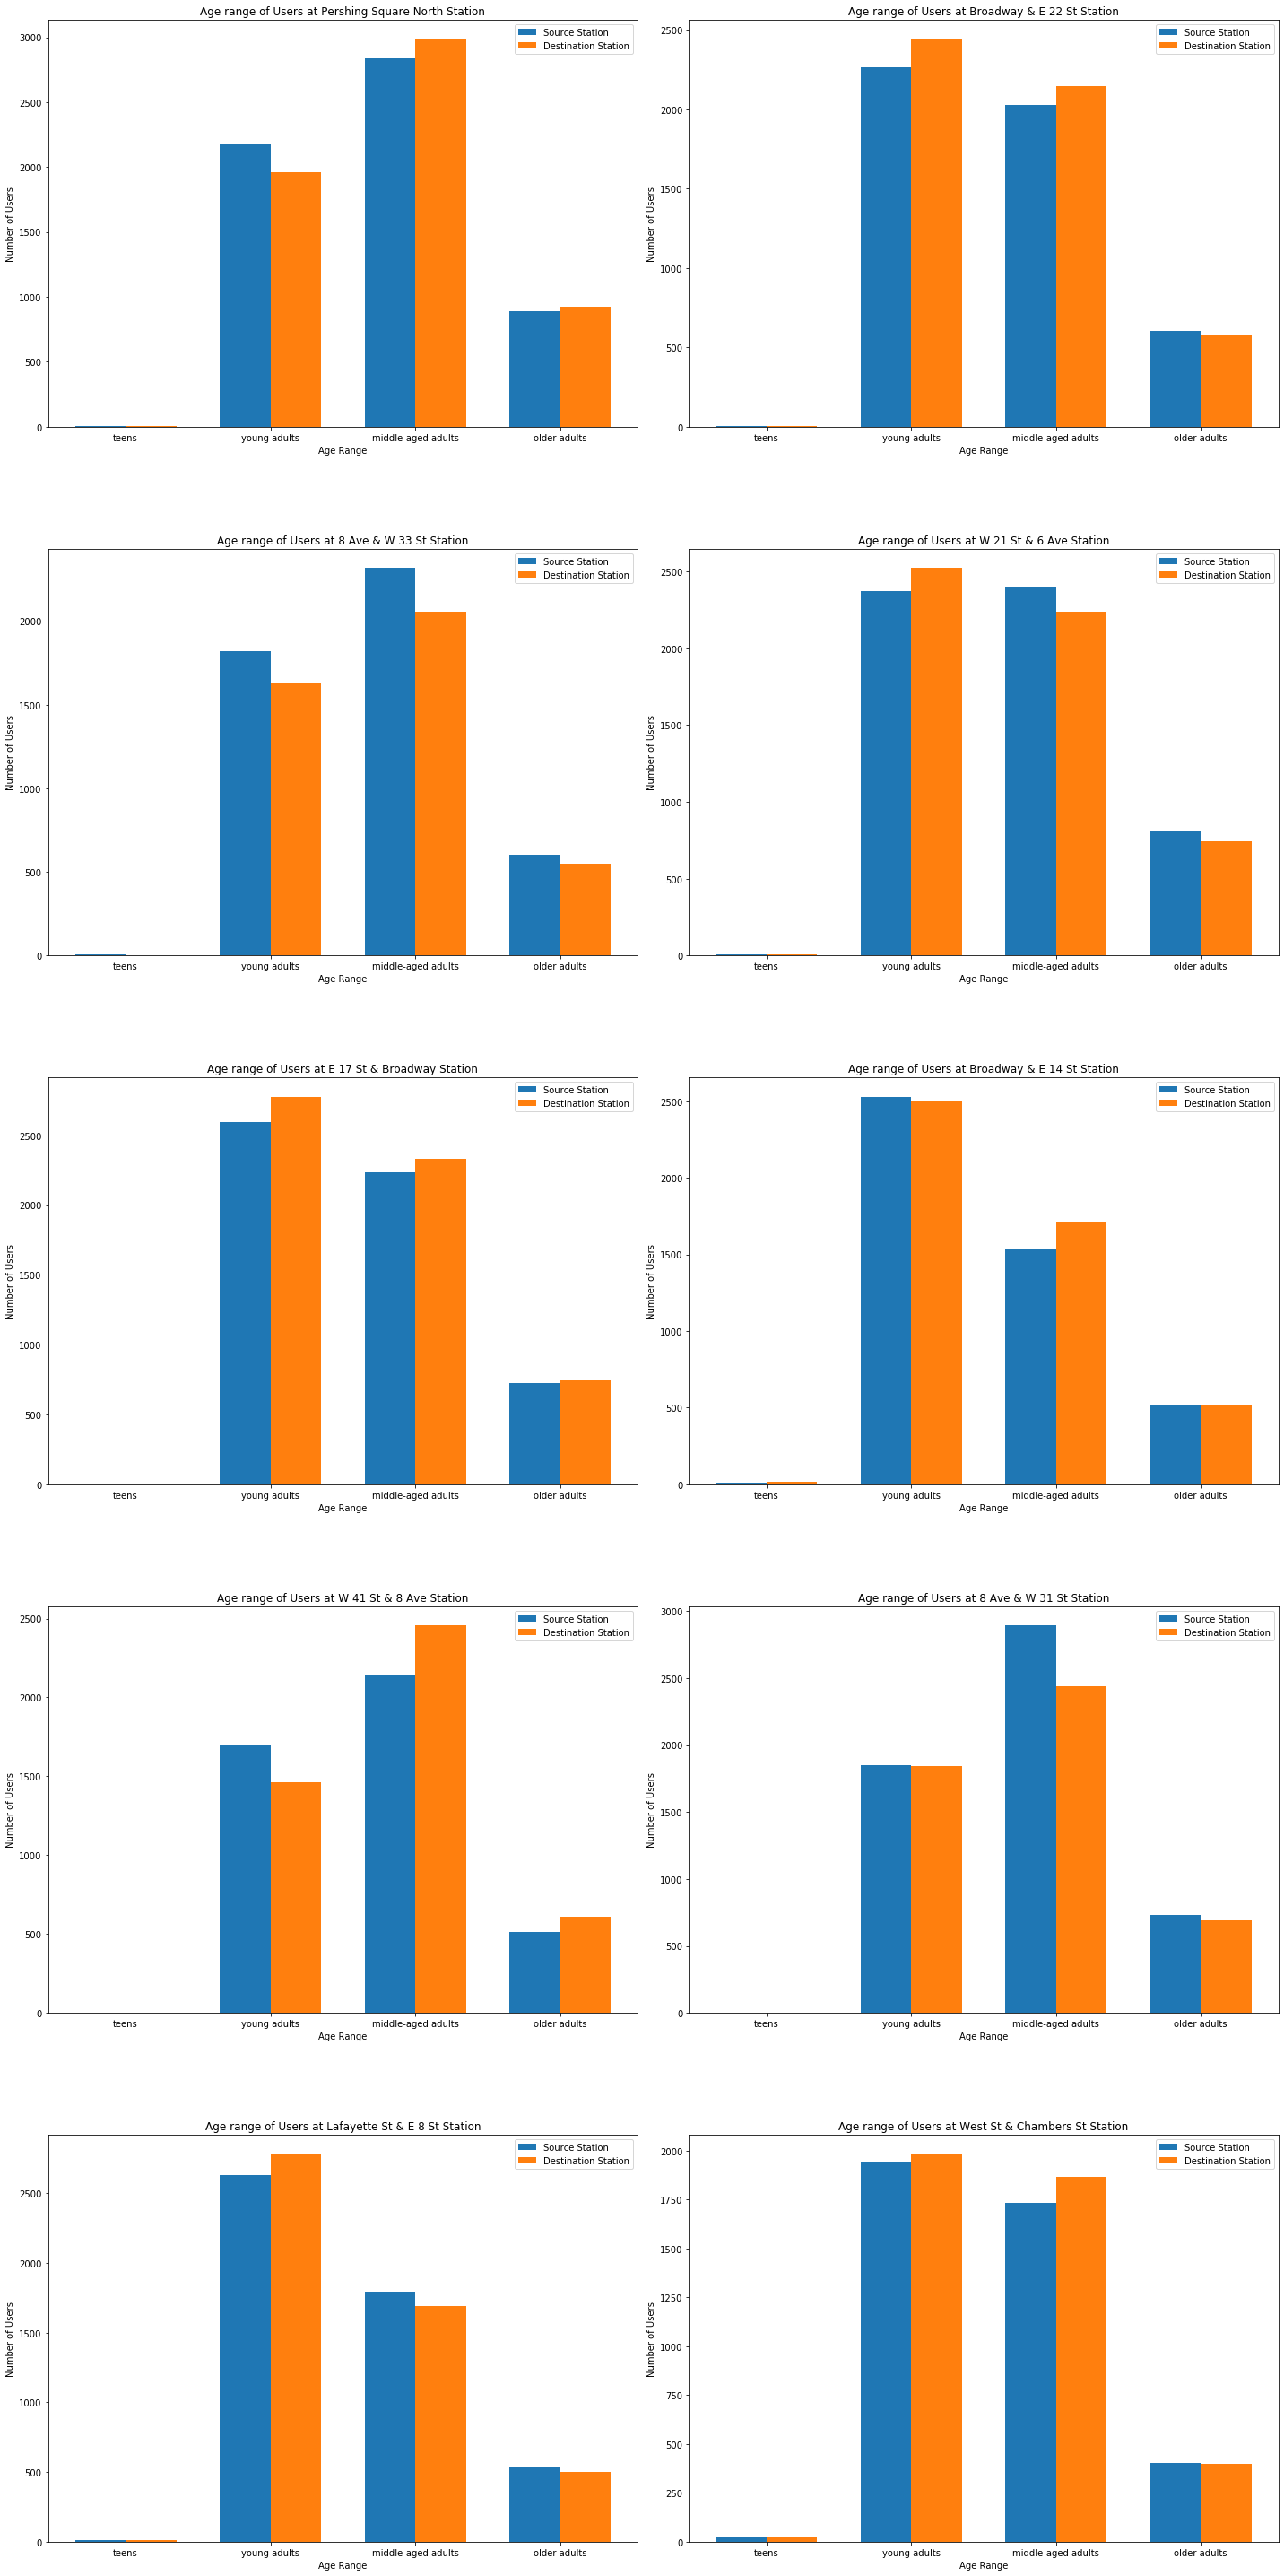

In [95]:
# Add new age column 
bikes_df['age'] = bikes_df['year']-bikes_df['birth year']

# The variables below will correspond to the subplot matrix 
# where i represents the row and j represents the column
i = 0
j = 0

fig, ax1 = plt.subplots(5, 2, figsize=(20, 40))
for name in top_x_start:
    current_subset = bikes_df.loc[bikes_df['start station name'] == name]
    age_hash_start = {'teens':0, 'young adults': 0, 'middle-aged adults': 0, 'older adults': 0}
    
    for index, row in current_subset.iterrows():
        user_age = row['age']
        if user_age < 18:
            age_hash_start['teens'] += 1
        elif user_age < 36:
            age_hash_start['young adults'] += 1
        elif user_age < 55:
            age_hash_start['middle-aged adults'] += 1
        else:
            age_hash_start['older adults'] += 1
            
    current_subset = bikes_df.loc[bikes_df['end station name'] == name]
    age_hash_end = {'teens':0, 'young adults': 0, 'middle-aged adults': 0, 'older adults': 0}
    
    for index, row in current_subset.iterrows():
        user_age = row['age']
        if user_age < 18:
            age_hash_end['teens'] += 1
        elif user_age < 36:
            age_hash_end['young adults'] += 1
        elif user_age < 55:
            age_hash_end['middle-aged adults'] += 1
        else:
            age_hash_end['older adults'] += 1
    
    ind = np.arange(4) 
    
    ax = ax1[i % 5, j % 2]
    ax.bar(ind, list(age_hash_start.values()), .35, label='Source Station', align='center')
    ax.bar(ind+.35, list(age_hash_end.values()), .35, label='Destination Station', align='center')
    ax.set_xlabel('Age Range')
    ax.set_xticks(ind+.35/2)
    ax.set_xticklabels(list(age_hash_end.keys()))
    ax.set_ylabel('Number of Users')
    ax.set_title('Age range of Users at ' + name + ' Station')
    ax.legend()
    i += 1
    j += 1
    
fig.tight_layout()
fig.subplots_adjust(hspace=0.3)
    

We can see that different age groups appear at different stations more than other age groups. Keep this in mind as it will help in our analysis. 

Now we can see what the most popular stations are in the histogram as well as the age groups that appear most at the station, but now let's see where they are on the map. By doing this, we can look at the stations and try to analyze the environment around that station so that we can understand why that station is so popular. First, we will graph the most popular source stations below. If you click on a point on the map, it will display the name of the Citibike station. 

In [30]:
map_osm = folium.Map(location=[40.7300, -74.0007], zoom_start=13)

# Add points to map to show most popular source stations
for name in top_x_start:
    # Retrieve the latitude and longitude of that location in dataframe     
    row = bikes_df.loc[bikes_df['start station name'] == name].iloc[0]
    lat = row['start station latitude']
    long = row['start station longitude']
    
    # Add a circle indicating the location in NYC
    folium.Circle(
        radius=20,
        location=[lat, long],
        popup=name,
        color='black',
        fill=True,
    ).add_to(map_osm)

map_osm


Likewise, we will graph the top 10 destination stations below

In [29]:
map_osm = folium.Map(location=[40.7300, -74.0007], zoom_start=13)

# Add points to map to show most popular destination stations
for name in top_x_end:
    # Retrieve the latitude and longitude of that location in dataframe     
    row = bikes_df.loc[bikes_df['end station name'] == name].iloc[0]
    lat = row['end station latitude']
    long = row['end station longitude']
    
    # Add a circle indicating the location in NYC      
    folium.Circle(
        radius=20,
        location=[lat, long],
        popup=name,
        color='blue',
        fill=True,
    ).add_to(map_osm)

map_osm


By looking at the graphs above, we can see that the most popular source and destination stations are the same and all of them are located in Manhattan. Also, we can observe that most of these locations are located near very busy bus/metro stations. For example, we can see that the most popular start station (Pershing Square North) is located right next to Grand Central Terminal which is one of the major metro stations in NYC. Likewise, there are Citibike stations right next to Port Authority Bus Terminal and 34th Street Penn Station. These two bus/metro stations are also very busy and popular stations for New Yorkers. Looking at our age range graphs for these stations, we can see that they are mostly middle-aged adults. We can infer that most Citibike users in this area use their bike to get to these stations either for work or travel or they leave from these stations after coming back from work. 

If we look at the downtown stations, Lafayette St & E 8 St and Broadway & E 14 St, we can see that these Citibike stations are near NYU, a university. By looking at our age range graphs, we can observe that most of the users, are young adults, college students. We can infer that most Citibike users in this area are college students who use the bikes to get to class or dorms. 
 

### Comparing Habits Between Subscribers and Customers (day-pass and single-ride users)

In [12]:
customers = bikes_df.loc[bikes_df['usertype'] == "Customer"]
subscribers = bikes_df.loc[bikes_df['usertype'] == "Subscriber"]

#### Customer vs Subscriber Frequency By Day of Week

TODO: Standardize for better comparison

In [13]:
# compare day of week,
week_day_sub= {}
week_day_cust= {}

# Fill time_of_day hash table with 0 occurrences of users for each hour
for i in range(0, 7):
    week_day_sub[i] = 0
    week_day_cust[i] = 0

# Loop through dataframe and increase counts of users by one 
# for that hour if the user started the trip at that hour
for index, row in bikes_df.iterrows():
    datetime_obj = row['starttime']
    if row['usertype'] == 'Customer':
        week_day_cust[datetime_obj.weekday()] += 1
    elif row['usertype'] == 'Subscriber':
        week_day_sub[datetime_obj.weekday()] += 1

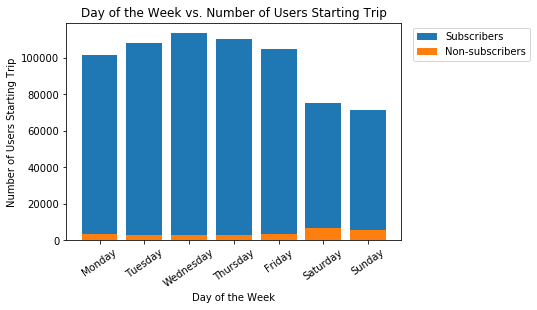

In [24]:
plt.bar( week_day_sub.keys(), week_day_sub.values(), label = 'Subscribers')
plt.bar( week_day_cust.keys(), week_day_cust.values(), label = 'Non-subscribers')
plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1))

days = ['Monday','Tuesday','Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday']
plt.xlabel('Day of the Week')
plt.xticks(list(week_day_cust.keys()), days, rotation=35)
plt.ylabel('Number of Users Starting Trip')
plt.title('Day of the Week vs. Number of Users Starting Trip')
plt.show()

From this graph, we can see several notable trends: 
1. Subscriber usage heavily outweighs non-subscriber usage.
2. Subscriber usage is at its highest during business days (Monday - Friday) and falls off on the weekends.
3. Non-subscriber usage peaks on the weekends (Saturday-Sunday) and falls off during business days. 

To make comparisons between subscribers and non-subscribers more easily, we need to standardize both datasets. To normalize the data, we will be computing the Z score for each the subscriber and non-subscriber datasets using this formula: 

Z = (X - mean) / stddev

In [15]:
mean_wd_sub = statistics.mean(list(week_day_sub.values()))
stdev_wd_sub = statistics.stdev(list(week_day_sub.values()))
std_wd_sub_vals = [(x - mean_wd_sub)/stdev_wd_sub for x in list(week_day_sub.values())]

mean_wd_cust = statistics.mean(list(week_day_cust.values()))
stdev_wd_cust = statistics.stdev(list(week_day_cust.values()))
std_wd_cust_vals = [(x - mean_wd_cust)/stdev_wd_cust for x in list(week_day_cust.values())]

print(std_wd_sub_vals)
print(std_wd_cust_vals)

[0.21019333424168007, 0.6054684827967725, 0.9084009730366976, 0.7293822691270186, 0.39308615092976623, -1.3089214555241753, -1.5376097546077607]
[-0.4651282279993014, -0.7118965198949194, -0.7204284023274807, -0.6547985374616249, -0.22623551988758606, 1.8463556125761422, 0.93213159499477]


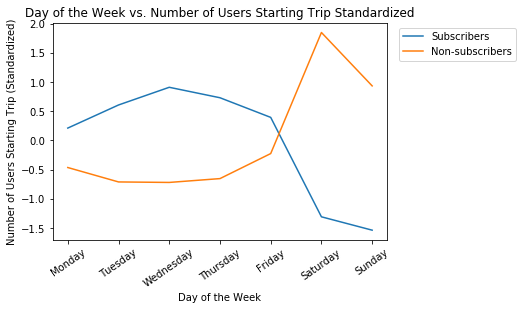

In [25]:
plt.plot( list(week_day_sub.keys()), std_wd_sub_vals, label='Subscribers')
plt.plot( list(week_day_cust.keys()), std_wd_cust_vals, label='Non-subscribers')
plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1))

days = ['Monday','Tuesday','Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday']
plt.xlabel('Day of the Week')
plt.xticks(list(week_day_cust.keys()), days, rotation=35)
plt.ylabel('Number of Users Starting Trip (Standardized)')
plt.title('Day of the Week vs. Number of Users Starting Trip Standardized')
plt.show()

This standardized graph shows us that subscriber and non-subscriber usage has an inverse relationship:
Through the business days, subscriber usage increases and non-subscriber usage decreases until wednesday. After Wednesday, subsccriber usage decreases and non-subscriber usage increases through the weekend

#### Customer vs Subscriber Frequency By Time of Day

TODO: Standardize for better comparison

In [17]:
# compare time of day

# compare day of week,
time_sub= {}
time_cust= {}

# Fill time_of_day hash table with 0 occurrences of users for each hour
for i in range(0, 24):
    time_sub[i] = 0
    time_cust[i] = 0

# Loop through dataframe and increase counts of users by one 
# for that hour if the user started the trip at that hour
for index, row in bikes_df.iterrows():
    datetime_obj = row['starttime']
    if row['usertype'] == 'Customer':
        time_cust[datetime_obj.hour] += 1
    elif row['usertype'] == 'Subscriber':
        time_sub[datetime_obj.hour] += 1

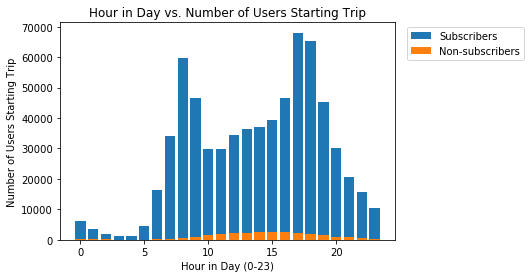

In [26]:
plt.bar(list(time_sub.keys()), list(time_sub.values()), label='Subscribers')
plt.bar(list(time_cust.keys()), list(time_cust.values()), label='Non-subscribers')
plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1))
plt.xlabel('Hour in Day (0-23)')
plt.ylabel('Number of Users Starting Trip')
plt.title('Hour in Day vs. Number of Users Starting Trip')
plt.show()

This graph again shows that:
1. Subscriber usage forms a bimodal distribution, peaking at 8 AM and 5-6 PM.
2. Non-subscriber usage forms a unimodal distribution, peaking between 1-5 PM.

However, the scales for subscribers and non-subscribers are again not the same, so we need to standardize the data as we did before using Z scores.


In [27]:
mean_hr_sub = statistics.mean(list(time_sub.values()))
stdev_hr_sub = statistics.stdev(list(time_sub.values()))
std_hr_sub_vals = [(x - mean_hr_sub)/stdev_hr_sub for x in list(time_sub.values())]

mean_hr_cust = statistics.mean(list(time_cust.values()))
stdev_hr_cust = statistics.stdev(list(time_cust.values()))
std_hr_cust_vals = [(x - mean_hr_cust)/stdev_hr_cust for x in list(time_cust.values())]

print(std_hr_sub_vals)
print(std_hr_cust_vals)

[-1.083168599863405, -1.2208497316155835, -1.2893983940321274, -1.3287080599175551, -1.3250592666732393, -1.1726370102140258, -0.5918950774487419, 0.27160400646271154, 1.5114639508811798, 0.8812443817229755, 0.06527691114080753, 0.063525490383536, 0.286685685205883, 0.3800947922603644, 0.4103554508998891, 0.5253167633841285, 0.8806605748038849, 1.9235829851824882, 1.784345034979402, 0.8115767560448414, 0.08444523831761257, -0.3766162760341168, -0.6178258347716787, -0.8740197710992303]
[-0.8893385096012414, -1.0066661869932934, -1.0795996080748393, -1.1239938643853455, -1.140905962027443, -1.11870883387219, -1.0267493029432844, -0.832260180059162, -0.5542675750671828, -0.21285460391733768, 0.3114204229876877, 0.7437359189638074, 1.259554897047784, 1.344115385258272, 1.4540440199319062, 1.4551010260345374, 1.461443062650324, 1.311348196076708, 0.9234269564110943, 0.41395001494290434, -0.07650081667792583, -0.333353299617283, -0.5415835018356097, -0.7413576552328874]


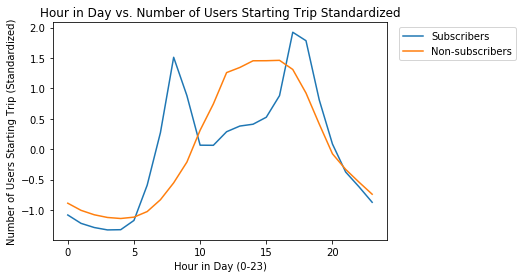

In [28]:
plt.plot(list(time_sub.keys()), std_hr_sub_vals, label="Subscribers")
plt.plot(list(time_cust.keys()), std_hr_cust_vals, label="Non-subscribers")
plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1))
plt.xlabel('Hour in Day (0-23)')
plt.ylabel('Number of Users Starting Trip (Standardized)')
plt.title('Hour in Day vs. Number of Users Starting Trip Standardized')
plt.show()

This graph better shows how usage compares throughout the day between subscribers and non-subcribers. To reiterate the same conclusions as the non-standardized plot:
1. Subscriber usage is low until around 7-9 AM where usage peaks, then decreaes at around 12-3 PM, then peaks again at 5-6 PM before finally falling off again (forming a bimodal distribution).
2. Non-subsriber usage starts low and gradually increases until 2-4 PM where usage peaks, then slowly falls down to lower levels (forming a unimodal distribution.




#### Heatmap of Trips for Customers vs Subscribers

In [19]:
map_osm = folium.Map(location=[40.7128, -74.0060], zoom_start=11)

bikes_df['count'] = 1
HeatMap(data=customers[['end station latitude', 'end station longitude']]
        .groupby(['end station latitude', 'end station longitude'])
        .sum().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(map_osm)

map_osm

In [20]:
map_osm = folium.Map(location=[40.7128, -74.0060], zoom_start=11)

bikes_df['count'] = 1
HeatMap(data=subscribers[['end station latitude', 'end station longitude']]
        .groupby(['end station latitude', 'end station longitude'])
        .sum().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(map_osm)

map_osm

The objective of this heatmap was to see if subscriber and non-subscriber usage was concentrated in specific areas (ie if subscriber usage was centered around office/work districts and if non-subscriber usage was centered around tourist attractions). It appears that end-stop locations between subscribers and non-subsribers is extremely similar. However, if you zoom in closer into the map, you can see that specific stops differ in 'heat'. For example, Penn Station and Grand Central are more popular stops for non-subscribers than it is for subscribers whereas the Spring St.-Lafayette Street stop is more popular for subscribers than it is for non-subscribers.



### Most popular Stops for Subscribers and Non-subscribers

In [69]:
sub_pop = {}
sub_pop_cust = {}

cust_pop = {}
cust_pop_sub = {}

# Getting the frequency of each end stop sorted by most frequent
cust_pop = customers['end station name'].value_counts()
sub_pop = subscribers['end station name'].value_counts()

#Standardizing data
mean_sub = statistics.mean(list(sub_pop))
stdev_sub = statistics.stdev(list(sub_pop))
std_sub_vals = [(x,(sub_pop[x] - mean_sub)/stdev_sub) for x in sub_pop.keys()]

mean_cust = statistics.mean(list(cust_pop))
stdev_cust = statistics.stdev(list(cust_pop))
std_cust_vals = [(x, (cust_pop[x] - mean_cust)/stdev_cust) for x in cust_pop.keys()]

# Getting the NON-subscriber frequency of the top 10 subscriber stops
for tup in std_cust_vals[:10]:
    cust_pop_sub[tup[0]] = list(filter(lambda x: tup[0] == x[0], std_sub_vals))[0][1]

# Getting the SUBSCRIBER frequency of the top 10 NON-subscriber stops
for tup in std_sub_vals[:10]:
    sub_pop_cust[tup[0]] = list(filter(lambda x: tup[0] == x[0], std_cust_vals))[0][1]

Text(0.5, 1.0, 'Most Popular End Stops for Subscribers (compared to non-subcsribers)')

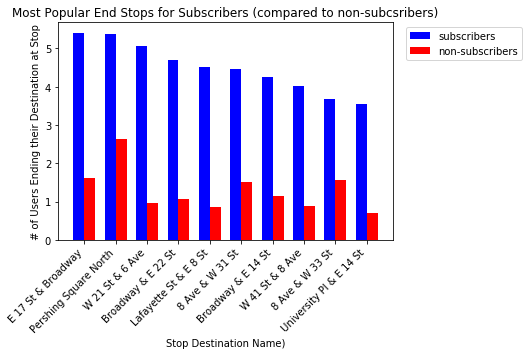

In [70]:
fig = plt.figure()
ax = fig.add_subplot(111)

N = 10
ind = np.arange(N) 

ax.bar(ind, [x[1] for x in std_sub_vals[:10]], width = 0.35, label='subscribers', align='center', color = 'b')
ax.bar(ind + 0.35, list(sub_pop_cust.values()), width = 0.35, label='non-subscribers', align='center', color = 'r')
plt.xticks(ind + 0.35 / 2, list(sub_pop[:10].keys()), rotation = 45, ha='right')
plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1))
plt.xlabel('Stop Destination Name)')
plt.ylabel('# of Users Ending their Destination at Stop')
plt.title('Most Popular End Stops for Subscribers (compared to non-subcsribers)')

This chart plots the frequency of the top 10 stops for Subscribers as well as the frequencies of the same stops for non-subscribers.

Text(0.5, 1.18, 'Most Popular End Stops for Non-subscribers (compared to subcsribers)')

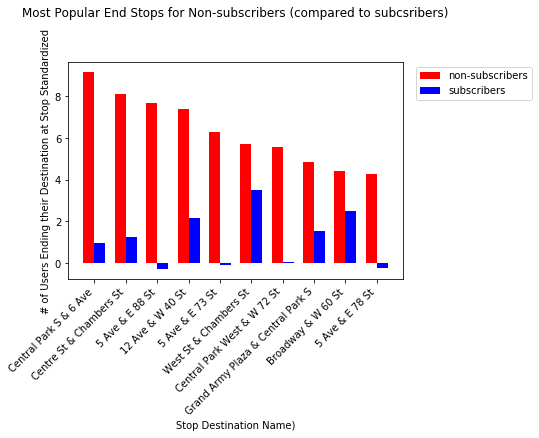

In [71]:
fig = plt.figure()
ax = fig.add_subplot(111)

N = 10
ind = np.arange(N) 

ax.bar(ind, [x[1] for x in std_cust_vals[:10]], width = 0.35, label='non-subscribers', align='center', color='r')
ax.bar(ind + 0.35, list(cust_pop_sub.values()), width = 0.35, label='subscribers', align='center', color='b')
plt.xticks(ind + 0.35 / 2, list(cust_pop[:10].keys()), rotation = 45, ha='right')
plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1))
plt.xlabel('Stop Destination Name)')
plt.ylabel('# of Users Ending their Destination at Stop Standardized')
plt.title('Most Popular End Stops for Non-subscribers (compared to subcsribers)', y=1.18)


This chart plots the top 10 most popular stops for non-subscribers and compares it to the normalized popularity of subscribers.

#### Analysis of the two charts:

It appears that the most popular stops for subcribers are not the most popular for non-subcribers. Inversely, the most popular stops for non-subscribers are not the most popular stops for subscribers. 


### Analysis of Gender on the Data
The goal of this section is trying to see if we can determine patterns for gender. For example, one of the things we studied was the density of bikeshare start positions and see where each gender is most concentrated. We make conclusions based which areas tend to be the most concentrated by gender. The first thing we did was segregate the data by gender, making on dataframe for males and one for females. One thing to note is that there were 3 gender classifications, with 0 representing unknown. At first, we wanted to include it, as it could be representing genders other than males and females, but we realized that it may also mean that the gender attribute was purely unknown. As a result of this ambiguity, we resolve to exclude unknown from our analysis.


In [21]:
bikes_df['count'] = 1
males_df = bikes_df[bikes_df['gender'] == 1]
females_df = bikes_df[bikes_df['gender'] == 2]

This code uses the folium **Map** object to initialize a map that is centered at New York City, just south of Manhattan. We then use the **HeatMap** object from the plugins module of folium and use the males dataframe from earlier. We plot the latitude and longitude of each coordinate together, using group_by and sum functions to combine the common observations, and then we add the HeatMap to our existing map and display it. The same was done for the feamle dataframe as well. 

In [22]:
map_osm_males = folium.Map(location=[40.7128, -74.0060], zoom_start=11)

HeatMap(data=males_df[['start station latitude', 'start station longitude', 'count']]
        .groupby(['start station latitude', 'start station longitude'])
        .sum().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(map_osm_males)

map_osm_males

In [23]:
map_osm_females = folium.Map(location=[40.7128, -74.0060], zoom_start=11)

HeatMap(data=females_df[['start station latitude', 'start station longitude', 'count']]
        .groupby(['start station latitude', 'start station longitude'])
        .sum().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(map_osm_females)

map_osm_females

Looking at the maps above, we get some interesting observations at first glance. The maps are pretty similar, but there are some subtle differences. In general, we see that there highly dense (red) areas near Grand Central, 1st Avenue & East 14th Street, Chinatown, etc. This makes sense because Grand Central and Chinatown are especially tourist and travel (work) heavy, so we are bound to see heat map concetrate on those areas. On subtle difference we can see is that near the Brooklyn sports area, specifically the region encompassing Brookyln Nets stadium, it is slightly more concentrated with males than with females. This potentially indicates that males utilize bike share at a higher frequency for the past 6 years than do females when considering this region in Brooklyn. 

Other than this slight difference, which we do not think is very significant, male and female patterns of where they begin their bike share trips are almost identical.

## Analysis of Models Predicting Gender
### Generating Models to Predict Gender
The goal of this section is to figure out whether we can accurate predict the gender of a potential. As a result, we set out to produce a couple of models and compare them as well. 

Creating the heat maps helped us figure out how to determine the our predictors for the logistic regression model. The goal of our model was to see if we could predict the gender, male or female, based on a few factors regarding trip details. Originally, we wanted to include the latitude and longitude in the predictors, but we realized that it was hard to interpret that in the model. Latitude increases going from south to north, while longitude increases going west to east. Despite these facts, we recognized that, as we were centering on a specific region, New York City, there would be very little variation amongst the values. They were very close together, so, for example, a rider starting their trip at a longitude that was 0.01 greater than that of another rider did not seem to be that signifcant in predicting the gender of a rider. While this may not be convincing alone, our heatmaps above defintely confirm this observation. As the heat maps are nearly identical, we see that a difference in latitude and longitude will not be a great determinant in predicting the gender of a potential rider. 

As a result, we decided to create models for predicting gender, based on **starttime, duration, usertype, and age**.

The first thing we will do is prepare our data to be modeled. This involves converting values, so that it can be easy to interpret. 
1. We first converted the **starttime** variable to seconds. To do so we extracted the time portion only from the datetime object and then converted it to seconds. This was because, as the data spanned over several years, the day of which the trip occurred did not matter for the purposes of modeling. We named the variable **startime_sec**. We summed the following:
    - time.hour * 3600 => seconds
    - time.minutes * 60 => seconds
    - time.second <br>
<br>
2. We then calculated the age by using existing attributes. We simply subtracted the **year** of the trip from the **birth year** of the rider of the trip to calculate the age of the rider. We named the variable **age**.
3. We converted the usertype variable to numerical format. While it being a string did not impact the logistic regression modeil, it did prevent the tree from being created.

In [97]:
bikes_df['starttime_sec'] = bikes_df['starttime'].map(lambda x: (x.hour * 3600) + (x.minute * 60) + x.second)
bikes_df['age'] = bikes_df['year'] - bikes_df['birth year']
bikes_df['usertype_code'] = bikes_df['usertype'].map({'Subscriber': 1, 'Customer': 0})

bikes_df

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,...,bikeid,usertype,birth year,gender,year,month,count,age,starttime_sec,usertype_code
0,300,2013-06-30 19:21:20.000,2013-06-30 19:26:20.000,530.0,11 Ave & W 59 St,40.771522,-73.990541,449.0,W 52 St & 9 Ave,40.764618,...,17034,Subscriber,1969,1,2013,6,1,44,69680,1
2,781,2013-06-26 12:59:35.000,2013-06-26 13:12:36.000,435.0,W 21 St & 6 Ave,40.741740,-73.994156,487.0,E 20 St & FDR Drive,40.733143,...,19195,Subscriber,1965,2,2013,6,1,48,46775,1
4,574,2013-06-02 09:10:43.000,2013-06-02 09:20:17.000,398.0,Atlantic Ave & Furman St,40.691652,-73.999979,2000.0,Front St & Washington St,40.702551,...,19606,Subscriber,1957,1,2013,6,1,56,33043,1
7,313,2013-06-09 14:21:06.000,2013-06-09 14:26:19.000,527.0,E 33 St & 2 Ave,40.744023,-73.976056,469.0,Broadway & W 53 St,40.763441,...,19142,Subscriber,1981,1,2013,6,1,32,51666,1
9,1073,2013-06-12 21:05:36.000,2013-06-12 21:23:29.000,517.0,Pershing Square South,40.751581,-73.977910,440.0,E 45 St & 3 Ave,40.752554,...,16476,Subscriber,1957,1,2013,6,1,56,75936,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
769995,477,2019-10-18 18:11:08.478,2019-10-18 18:19:06.179,402.0,Broadway & E 22 St,40.740343,-73.989551,267.0,Broadway & W 36 St,40.750977,...,38486,Subscriber,1978,1,2019,10,1,41,65468,1
769996,770,2019-10-01 18:52:59.108,2019-10-01 19:05:50.056,3016.0,Kent Ave & N 7 St,40.720368,-73.961651,3452.0,Bayard St & Leonard St,40.719156,...,35125,Customer,1969,0,2019,10,1,50,67979,0
769997,250,2019-10-04 15:38:44.308,2019-10-04 15:42:54.463,301.0,E 2 St & Avenue B,40.722174,-73.983688,401.0,Allen St & Rivington St,40.720196,...,34112,Subscriber,1986,1,2019,10,1,33,56324,1
769998,594,2019-10-18 21:08:55.721,2019-10-18 21:18:49.825,3707.0,Lexington Ave & E 26 St,40.741459,-73.983293,432.0,E 7 St & Avenue A,40.726218,...,14545,Subscriber,1991,2,2019,10,1,28,76135,1


The second thing that we will do is normalize the data set. The reason for this is because we noticed that the **starttime_sec** and **duration** predictors were much larger in magnitude, compared to the rest of the predictors we chose. Another reason for doing so was because we wanted to make sure we could compare their impacts on predicting gender, relatively speaking. It normalizes the distances between the values, putting them on a similar scale.

To do this, we made our own function to standardize a pandas Series object by computing the z-score of each data value. In other words, we took every data item for attribute and computed its z-score. 
<br><br>
**z-score = (value - mean) / (standard deviation)**
<br><br>
We standardized all the predictors this way and created our dataframe.

In [98]:
def standardize_attr(series):
    avg = series.mean()
    stdv = series.std()
    series_standardized = (series - avg) / stdv
    return series_standardized

attrs = ['starttime_sec', 'tripduration', 'age', 'usertype_code', 'gender']

norm_bikes_df = bikes_df[attrs]

norm_bikes_df = norm_bikes_df[norm_bikes_df['gender'] != 0]
norm_bikes_df['gender'] -= 1
attrs.pop()
attrs.pop()

for attr in attrs:
    norm_bikes_df[attr] = standardize_attr(norm_bikes_df[attr])
    
norm_bikes_df

,starttime_sec,tripduration,age,usertype_code,gender
0,1.023217,-0.028307,0.482221,1,0
2,-0.272387,-0.003121,0.823012,1,1
4,-1.049127,-0.013959,1.504595,1,0
7,0.004269,-0.027626,-0.540153,1,0
9,1.377083,0.012169,1.504595,1,0
...,...,...,...,...,...
769994,1.782536,-0.005163,-0.795747,0,0
769995,0.784969,-0.019039,0.226627,1,0
769997,0.267745,-0.030925,-0.454956,1,0
769998,1.388340,-0.012912,-0.880945,1,1


The third thing we will do is randomly section out data for training, validation, and test data. We will use a **75-25** split, which corresponds to 75% training data and 25% test data. Before this, we made sure sample out **100000** random observations from the data set. This was because the kernel kept dying when using all over 700000 observations. To do this, we will use the **train_test_split** function from the model_selection module of sklearn. As we are generating a couple of models, we want to be able to compare them on the same dataset, which will be our test data in this case. <br><br>


In [99]:
norm_bikes_df = norm_bikes_df.sample(100000)

y = norm_bikes_df['gender']
norm_bikes_train, norm_bikes_test, gender_train, gender_test = train_test_split(norm_bikes_df, y, test_size=0.25)

print(f'The size of our training data is {len(norm_bikes_train)}.')
print(f'The size of our test data is {len(norm_bikes_test)}.')

The size of our training data is 75000.
The size of our test data is 25000.


In [100]:
norm_bikes_train

,starttime_sec,tripduration,age,usertype_code,gender
337767,-0.968862,-0.011917,1.249001,1,0
737651,0.640447,0.014840,-0.284560,1,0
378044,1.055855,-0.030977,1.078605,1,0
494758,0.438004,-0.020714,-0.369758,1,0
522481,-0.021298,-0.025479,-0.540153,1,1
...,...,...,...,...,...
216079,-1.217858,0.018453,-1.136538,1,0
233721,1.601700,-0.014221,-1.647725,1,0
141837,0.616747,-0.017415,1.589793,1,0
256714,0.653627,0.067306,-0.710549,1,0


In [101]:
norm_bikes_test

,starttime_sec,tripduration,age,usertype_code,gender
22465,-0.684401,-0.030977,0.311825,1,0
547740,-0.303667,0.005676,0.056231,1,0
610874,0.437325,0.019081,1.249001,1,1
570839,1.194098,0.003111,-0.540153,1,0
410615,0.783668,0.023322,-0.284560,1,0
...,...,...,...,...,...
3833,0.088889,-0.016159,-1.051341,1,0
111637,-0.981476,-0.001026,-0.710549,1,0
411833,1.084194,-0.004377,-0.795747,1,1
98535,-1.100544,0.025050,1.419397,1,0


##### Logistic Regression

Now we will generate our model for logistic regression on training data set we created above.

In [102]:
response = 'gender'
predictors = 'starttime_sec + tripduration + usertype_code + age'
formula = f'{response} ~ {predictors}'

log_reg_model = smf.glm(formula = formula, data=norm_bikes_train, family=sm.families.Binomial())
result = log_reg_model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 gender   No. Observations:                75000
Model:                            GLM   Df Residuals:                    74995
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -41123.
Date:                Mon, 16 Dec 2019   Deviance:                       82246.
Time:                        04:42:54   Pearson chi2:                 7.50e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.6504      0.054    -12.133      0.000      -0.756      -0.545
starttime_sec     0.0036      0.009      0.421      0.674      -0.013       0.020
tripduration      0.0169      0.016      1.066      0.286      -0.014       0.048
usertype_code    -0.5225      0.054     -9.627      0.000      -0.629      -0.416
age              -0.1086      0.009    -12.277      0.000      -0.126      -0.091
=================================================================================
"""

From the logistic regression model we can analyze the coefficients to see determine how they affect the classification of gender. Please note that repeated runs of the training and testing data set splitting, might yield different fits. When we fitted the model repeated times in this fashion, we saw that the majority of models had all significant predictors (near-zero p-values). In the few exceptions, we saw that starttime_sec and, rarely, tripduration were insignificant in explaining the response. We will assume, for the purposes of this analysis, that all the predictors were significant. We performed z-tests (null hypothesis is that the predictor is insignifcant, when accounting for other predictors, and the alternative hypothesis is that the predictor is significant, when accounting for other predictors) on all of them and found that their associated p-values were all less than a significance level of alpha=0.5 (rejected the null hypothesis each time). With the same reasoning, coefficients also change in every rerun of the model. With every model, we saw that intercept, starttime_sec, usertype_code, and age were all negative, while the coefficient of tripduration was positive. We will, as a result, assume that their signs stay the same for the purposes of this analysis. 

Each of the interpretions of the coefficients are as follows:

1. starttime_sec: For every additional second later in the day, on average, the odds of a bike rider being classified as female decrease by factor of e^(-0.0214) = 0.979, while holding other predictors fixed. This coefficient is negative, which indicates that it generally decreases the probability of a rider being classified as female. However, the coefficient is near-zero in magnitude, indicating that it has little influence on the probability of a rider being classified as female. 

2. tripduration: For every additional second in trip duration, on average, the odds of a bike rider being classified as female increase by factor of e^(0.4521) = 1.572, while holding other predictors fixed. This coefficient is positive, which indicates that it generally increases the probability of a rider being classified as female. The coefficient is larger in magnitude, relative to the other coefficients, indicating that it has a large influence on the probability of a rider being classified as female. 

3. usertype_code: Being a Subscriber, on average, the odds of a bike rider being classified as female decrease by factor of e^(-0.4878) = 0.614, when compared to Customers, while holding other predictors fixed. This coefficient is negative, which indicates that it generally decreases the probability of a rider being classified as female. The coefficient is larger in magnitude, relative to the other coefficients, indicating that it has a large influence on the probability of a rider being classified as female. 

4. age: For every additional year, on average, the odds of a bike rider being classified as female increase by factor of e^(-0.1217) = 0.885, while holding other predictors fixed. This coefficient is negative, which indicates that it generally decreases the probability of a rider being classified as female. The coefficient is not as large when compared to (2) and (3) in magnitude, relative to the other coefficients, indicating that it has a decent influence on the probability of a rider being classified as female. 


##### Performance of Logistic Regression

To test the accuracy of our model, we evaluated its performance on the test data set we sectioned out earlier. With those probabilites, we then classified each predicted observation, with above 0.5 being classified as female and below being classified as male. We then counted the number of matching observations and then divided that by the total number of observations.


In [103]:
features = ['starttime_sec', 'tripduration', 'usertype_code', 'age']

gender_pred_probs = result.predict(norm_bikes_test[features])
gender_pred = [1 if prob > 0.5 else 0 
               for prob in gender_pred_probs]

num_correct = 0
pred_iter = 0

for true_value in gender_test:
    if true_value == gender_pred[pred_iter]:
        num_correct += 1
    pred_iter += 1
    
print(f'There were {num_correct} correctly predicted observations out of {len(gender_pred)}.')
print(f'This yields a model prediction accuracy of about {100 * num_correct / len(gender_pred)}%.')

There were 19085 correctly predicted observations out of 25000.
This yields a model prediction accuracy of about 76.34%.


##### kNN
Now we will generate our k-nearest neigbors (kNN). We will use libraries to help with corss validation procedure, so that we can generate a tree with optimal number of neighbors. To do this we will utilize sklearn's **DecisionTreeClassifier** object to build the tree and sklearn's **GridSearchCV** object from the model_selection module to perform the 10-fold cross-validation procedure. We will perform this on the training data.

From constructing the kNN model, we first had to tune the hyperparameter, in this case the number of neighbors. To do so, we performed a 10-fold cross validation procedure and tested parameters from 2 to 10, inclusive. We found that the optimal number of neighbors was 8. However, please note that this value may tune differently on repeated runs.


In [104]:
response = 'gender'
features = ['starttime_sec', 'tripduration', 'usertype_code', 'age']

param_grid = {'n_neighbors': range(2,10)}

knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid.fit(X=norm_bikes_train[features], y=gender_train)
best_clf = grid.best_estimator_

print (grid.best_params_)

{'n_neighbors': 8}


##### Performance of kNN

To test the accuracy of our model, we evaluated its performance on the test data set we sectioned out earlier. We then counted the number of matching observations and then divided that by the total number of observations.



In [105]:
gender_pred = best_clf.predict(norm_bikes_test[features])

num_correct = 0
pred_iter = 0

for true_value in gender_test:
    if true_value == gender_pred[pred_iter]:
        num_correct += 1
    pred_iter += 1
    
print(f'There were {num_correct} correctly predicted observations out of {len(gender_pred)}.')
print(f'This yields a model prediction accuracy of about {100 * num_correct / len(gender_pred)}%.')

There were 18764 correctly predicted observations out of 25000.
This yields a model prediction accuracy of about 75.056%.


From comparing the predictive capabilities of both of the logistic regression and kNN models, we found that both of them were quite accurate in predicting whether a potenital rider, given their age, duration of trip, start time of trip in the day, and user type. In general, these accuracies are bound to change, but we found that logistic regression did slightly better in its performance. 

From the logistic model, we can also determine which predictors are most important in predicting the gender of a rider. From the high coefficients of trip duration and user_type, we would say that these predictors are the most important and influential in predicting the gender of a rider. Being a Subscriber significantly decreases odds, on average, of predicting a rider to be female, when accounting for other predictors. Having a higher trip duration significantly increase odds, on average, of predicting a rider to be female, when accounting for other predictors. 

The nature of the relationship that we are trying to classify is inherently ambiguous, but these models do show that there is some potential in a model being able to classify a rider as male of female correctly. 


## Insight and Policy Decisions